# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.
- Zakresy osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być docięte do granic obszaru, na którym został wygenerowany proces punktowy.
- Proporcje osi wykresów przedstawiających rozkłady punktów w przestrzeni powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni. Nie należy osiągać tego efektu manipulując rozmiarem całej figury.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

---

## Zestaw zadań 1: Generowanie procesów punktowych

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
import random

### Zadanie 1: Proces regularny z komponentem losowym w obrębie prostokątnego obszaru [7 pkt]

#### a) Przygotowanie funkcji
Przygotuj funkcję `regular_on_rectangle()`, która będzie generować proces regularny z komponentem losowym w obrębie prostokątnego obszaru.

Algorytm postępowania:
1) Generujemy punkty na regularnej siatce tak, że poszczególne punkty są oddalone od siebie o odległość $d_x$ w poziomie i $d_y$ w pionie, a skrajne punkty są oddalone od krawędzi obszaru odpowiednio o $\frac{1}{2} d_x$ w poziomie i $\frac{1}{2}d_y$ w pionie.
2) Do współrzędnych każdego z punktów dodajemy komponent losowy określony wzorem $r \cdot rand$ , gdzie $r$ to parametr określający wielkość komponentu losowego, a $rand$ to wartość wylosowana z rozkładu jednostajnego na przedziale $[-\frac{1}{2} d_x, \frac{1}{2} d_x]$ w przypadku współrzędnej $x$ i na przedziale $[-\frac{1}{2} d_y, \frac{1}{2} d_y]$ w przypadku współrzędnej $y$.

In [3]:
def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    dx = (x_lim[1]-x_lim[0])/grid[0]
    dy = (y_lim[1]-y_lim[0])/grid[1]
    x_points = np.arange(x_lim[0]+1/2*dx,x_lim[1],dx)
    y_points = np.arange(y_lim[0]+1/2*dy,y_lim[1],dy)
    x_mesh, y_mesh = np.meshgrid(x_points, y_points)
    x_mesh = x_mesh.flatten()
    y_mesh = y_mesh.flatten()
    x_mesh += random_component*np.random.uniform(-1/2*dx,1/2*dx,len(x_mesh)) 
    y_mesh += random_component*np.random.uniform(-1/2*dy,1/2*dy,len(y_mesh)) 
    d = {"X" : x_mesh,"Y" : y_mesh}
    res = pd.DataFrame(d)
    return res

In [4]:
# Komórka testowa
test_points_1 = regular_on_rectangle(grid=[30, 15], random_component=0.25, x_lim=[-5, 15], y_lim=[20, 25])
assert type(test_points_1) == pd.DataFrame
assert test_points_1.shape == (450, 2)
assert list(test_points_1.columns) == ["X", "Y"]
assert np.min(test_points_1["X"]) >= -5
assert np.max(test_points_1["X"]) <= 15
assert np.min(test_points_1["Y"]) >= 20
assert np.max(test_points_1["Y"]) <= 25

test_points_2 = regular_on_rectangle(grid=[50, 50], random_component=0.47, x_lim=[-10, 10], y_lim=[-30, -10])
assert type(test_points_2) == pd.DataFrame
assert test_points_2.shape == (2500, 2)
assert list(test_points_2.columns) == ["X", "Y"]
assert np.min(test_points_2["X"]) >= -10
assert np.max(test_points_2["X"]) <= 10
assert np.min(test_points_2["Y"]) >= -30
assert np.max(test_points_2["Y"]) <= -10

#### b) Wygenerowanie procesu i wizualizacja

Wykorzystaj przygotowaną funkcję do wygenerowania następującego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Parametry rozkładu:
 - liczba punktów w poziomie: 20
 - liczba punktów w pionie: 10
 - wartość współczynnika określającego siłę komponentu losowego: 0.5
 - zakres wartości współrzędnej x: $[20, 40]$
 - zakres wartości współrzędnej y: $[-10, 0]$

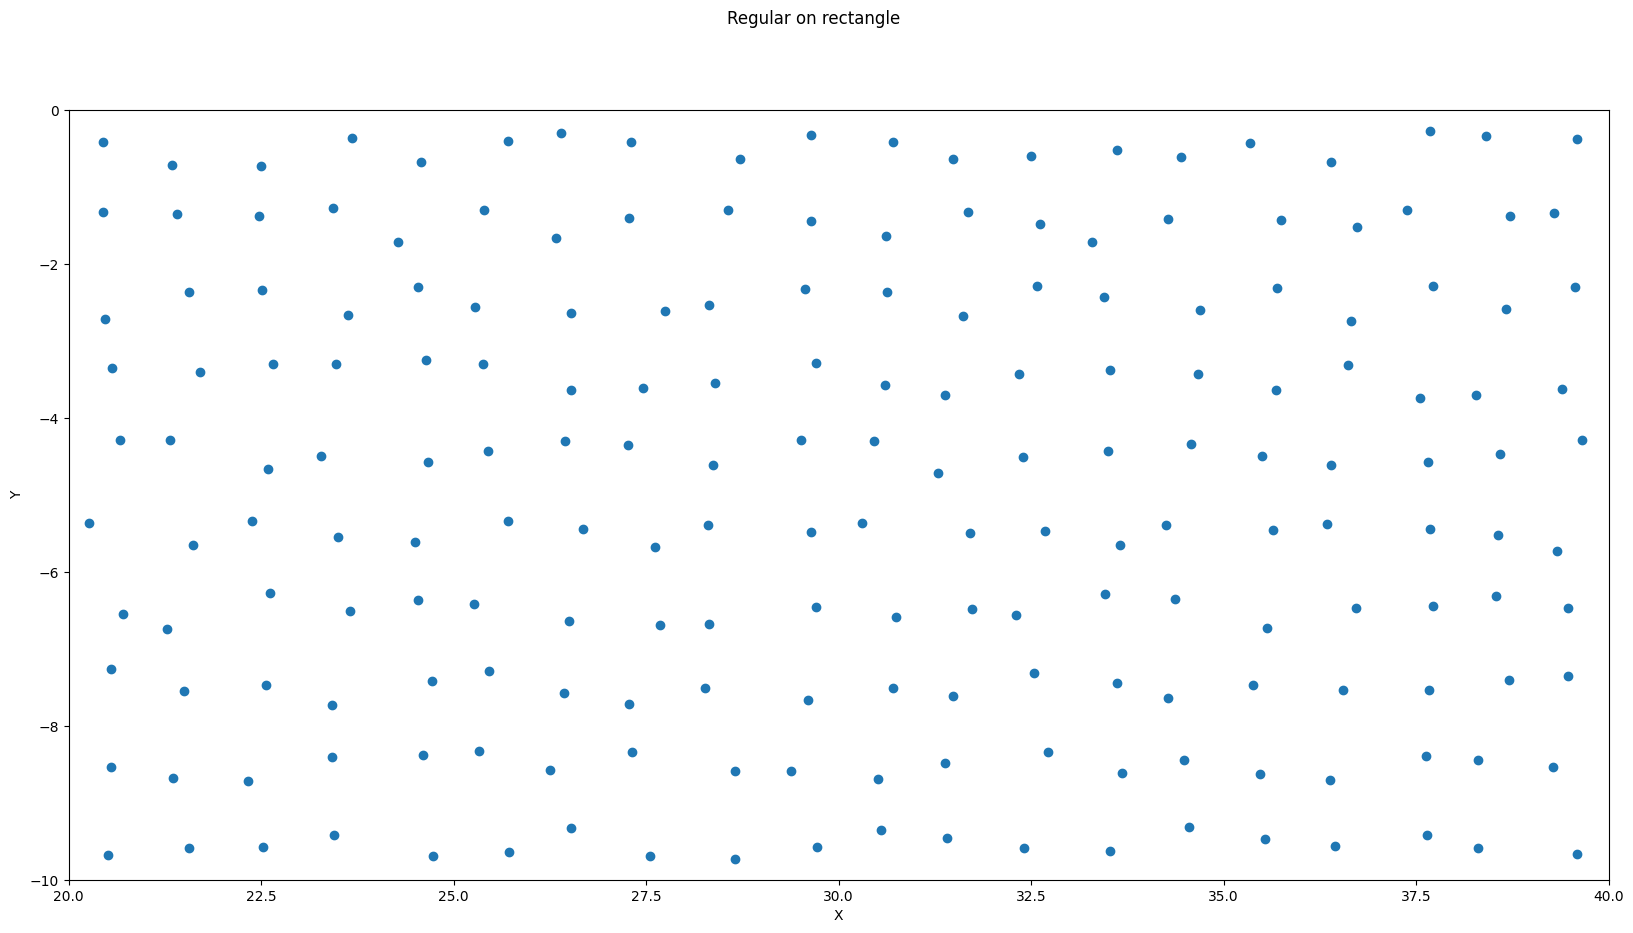

In [5]:
points = regular_on_rectangle([20,10], 0.5, [20,40], [-10,0])
fig, axes = plt.subplots(1,1,figsize=(20,10))
axes.axis("square")
axes.set_xlim(20,40)
axes.set_ylim(-10,0)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(points["X"], points["Y"])
fig.suptitle("Regular on rectangle")
plt.grid(False)

### Zadanie 2: Jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [7 pkt]

#### a) Przygotowanie funkcji
Przygotuj funkcję `homogeneous_poisson_on_rectangle()`, która będzie generować jednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Losujemy liczbę punktów $n$ z rozkładu Poissona o wartości oczekiwanej równej $i \cdot a$, gdzie $i$ to intensywność procesu, a $a$ jest powierzchnią obszaru, na którym generujemy punkty.
2. Niezależnie od siebie losujemy wartości współrzędnych $n$ punktów z rozkładów jednostajnych na przedziałach określonych przez przyjęte zakresy wartości współrzędnych $x$ i $y$.

In [6]:
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    area = (x_lim[-1] - x_lim[0])*(y_lim[-1] - y_lim[0])
    number_of_points = np.random.poisson(intensity*area)
    x = np.random.uniform(x_lim[0], x_lim[-1], number_of_points)
    y = np.random.uniform(y_lim[0], y_lim[-1], number_of_points)
    points = pd.DataFrame({"X" : x, "Y" : y})
    return points

In [7]:
# Komórka testowa
test_points_3 = homogeneous_poisson_on_rectangle(intensity=5, x_lim=[-11, 18], y_lim=[5, 10])
assert type(test_points_3) == pd.DataFrame
assert test_points_3.shape[1] == 2
assert list(test_points_3.columns) == ["X", "Y"]
assert np.min(test_points_3["X"]) >= -11
assert np.max(test_points_3["X"]) <= 18
assert np.min(test_points_3["Y"]) >= 5
assert np.max(test_points_3["Y"]) <= 10

test_points_4 = homogeneous_poisson_on_rectangle(intensity=2.5, x_lim=[13 ,27], y_lim=[-15, -8])
assert type(test_points_4) == pd.DataFrame
assert test_points_4.shape[1] == 2
assert list(test_points_4.columns) == ["X", "Y"]
assert np.min(test_points_4["X"]) >= 13
assert np.max(test_points_4["X"]) <= 27
assert np.min(test_points_4["Y"]) >= -15
assert np.max(test_points_4["Y"]) <= -8

#### b) Wygenerowanie procesu i wizualizacja
Wykorzystaj przygotowaną funkcję do wygenerowania następującego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Parametry rozkładu:
 - intensywność procesu: 10
 - zakres wartości współrzędnej x: $[-10, 10]$
 - zakres wartości współrzędnej y: $[5, 15]$

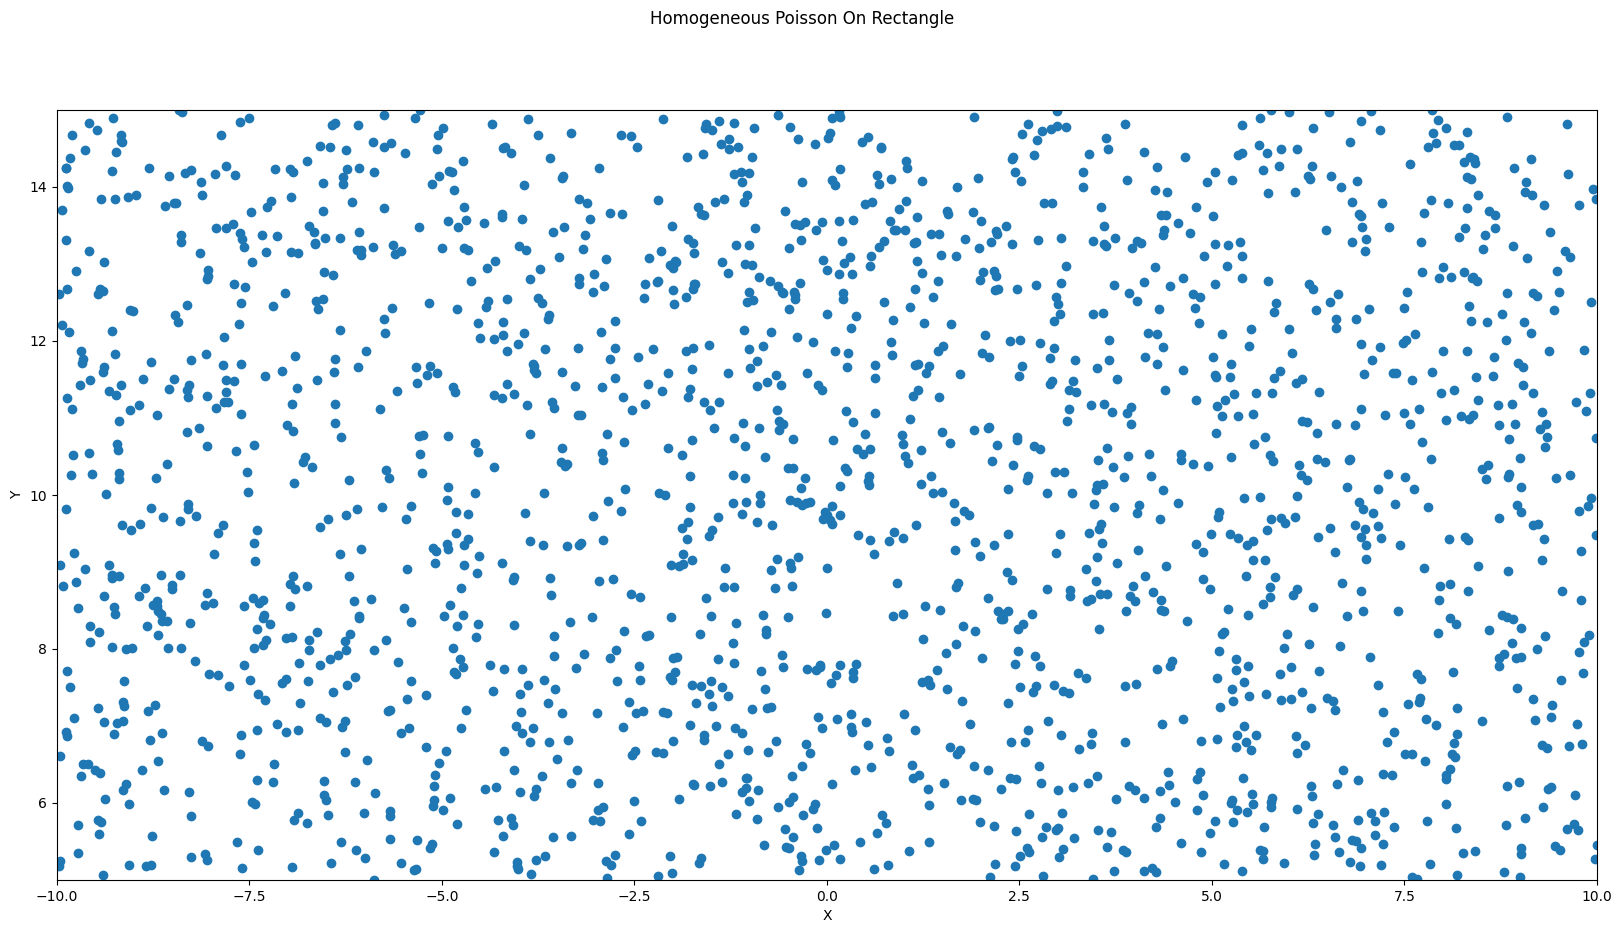

In [8]:
fig, axes = plt.subplots(1,1,figsize=(20,10))
points =  homogeneous_poisson_on_rectangle(intensity=10, x_lim=[-10,10], y_lim=[5,15])
axes.axis("square")
axes.set_xlim(-10,10)
axes.set_ylim(5,15)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(points["X"], points["Y"])
fig.suptitle("Homogeneous Poisson On Rectangle")
plt.grid(False)

### Zadanie 3: Niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru [12 pkt]

#### a) Przygotowanie funkcji
Przygotuj funkcję `unhomogeneous_poisson_on_rectangle()`, która będzie generować niejednorodny proces punktowy Poissona w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Generujemy punkty z wykorzystaniem jednorodnego procesu Poissona przyjmując intensywność procesu równą maksymalnej wartości jaką osiąga funkcja intensywności w analizowanym obszarze ($i_{max}$).
2. Przerzedzamy rozkład usuwając z niego punkty z prawdopodobieństwem równym $1-\frac{i}{i_{max}}$, gdzie $i$ to wartość jaką przyjmuje funkcja intensywności dla współrzędnych danego punktu, a $i_{max}$ to maksymalna wartość jaką funkcja intensywności osiąga w granicach analizowanego obszaru.


Uwagi do wykonania zadania:
- W celu znalezienia maksymanej wartości funkcji intensywności w obrębie obszaru należy skorzystać z funkcji `scipy.optimize.minimize()`.
- W części zadania dotyczącej generowania jednorodnego procesu punktowego Poissona nie należy dublować kodu napisanego w ramach zadania 2, a jedynie wywołać przygotowaną w ramach tego zadania funkcję `homogeneous_poisson_on_rectangle()`.

In [18]:
def unhomogeneous_poisson_on_rectangle(intensity_function, x_lim, y_lim):
    def intensity(x,sign=1.0):
        return sign*intensity_function(x[0],x[1])     
    x0 = [(x_lim[1]+x_lim[0])/2,(y_lim[1]+y_lim[0])/2]
    args_max = sp.optimize.minimize(intensity, [-1.0,1.0], args=(-1.0,),bounds = ((x_lim[0],x_lim[1]),(y_lim[0],y_lim[1])))
    imax = intensity_function(args_max.x[0],args_max.x[1])
    points = homogeneous_poisson_on_rectangle(imax, x_lim, y_lim)
    for ind in range(len(points)-1,-1,-1):
        prob = 1 - intensity_function(points.iloc[ind,0],points.iloc[ind,1])/imax
        if (random.random() < prob):
            points.drop(ind,inplace = True)
    return points

In [19]:
# Komórka testowa
def test_intensity_function(x, y):
    return x + 20

test_points_5 = unhomogeneous_poisson_on_rectangle(test_intensity_function, x_lim=[-15, 10], y_lim=[5, 15])
assert type(test_points_5) == pd.DataFrame
assert test_points_5.shape[1] == 2
assert list(test_points_5.columns) == ["X", "Y"]
assert np.min(test_points_5["X"]) >= -15
assert np.max(test_points_5["X"]) <= 10
assert np.min(test_points_5["Y"]) >= 5
assert np.max(test_points_5["Y"]) <= 15

test_points_6 = unhomogeneous_poisson_on_rectangle(test_intensity_function, x_lim=[7, 21], y_lim=[-14, -1])
assert type(test_points_6) == pd.DataFrame
assert test_points_6.shape[1] == 2
assert list(test_points_6.columns) == ["X", "Y"]
assert np.min(test_points_6["X"]) >= 7
assert np.max(test_points_6["X"]) <= 21
assert np.min(test_points_6["Y"]) >= -14
assert np.max(test_points_6["Y"]) <= -1

#### b) Wygenerowanie procesu i wizualizacja
Wykorzystaj przygotowaną funkcję do wygenerowania następującego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Parametry rozkładu:
 - intensywność procesu: f(x, y) = 2*x + 5*y
 - zakres wartości współrzędnej x: $[0, 20]$
 - zakres wartości współrzędnej y: $[0, 10]$

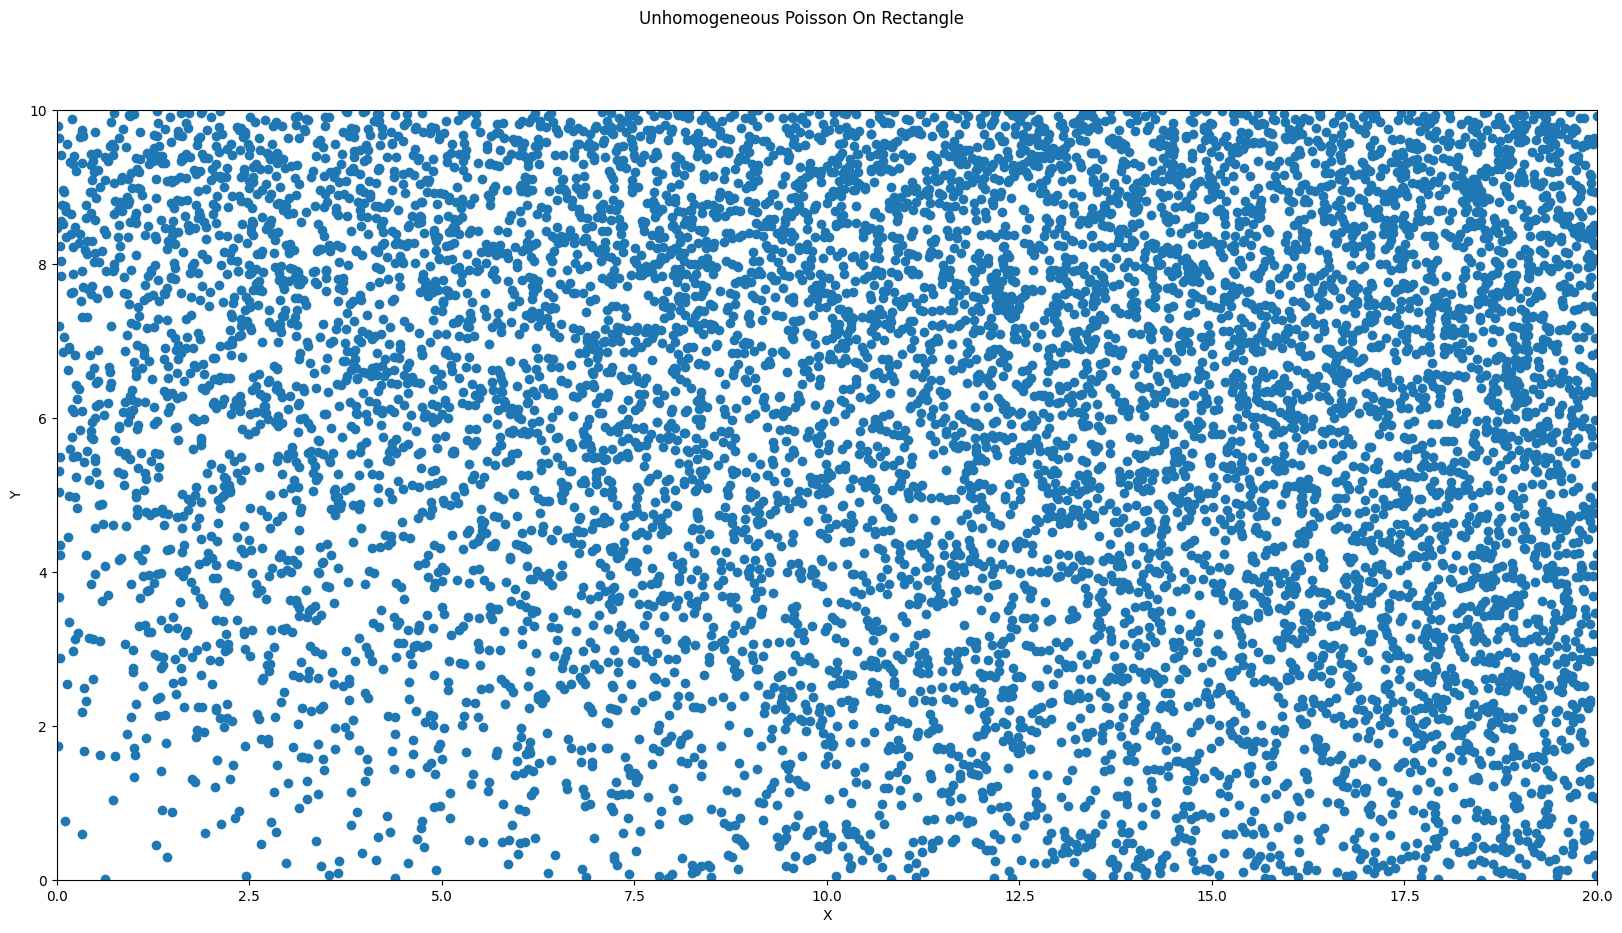

In [11]:
def intensity_function(x, y):
    return 2*x + 5*y
    
fig, axes = plt.subplots(1,1,figsize=(20,10))
points =  unhomogeneous_poisson_on_rectangle(intensity_function, [0,20], y_lim=[0,10])
axes.axis("square")
axes.set_xlim(0,20)
axes.set_ylim(0,10)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(points["X"], points["Y"])
fig.suptitle("Unhomogeneous Poisson On Rectangle")
plt.grid(False)

### Zadanie 4: Proces punktowy Matérna w obrębie prostokątnego obszaru [12 pkt]

#### a) Przygotowanie funkcji
Przygotuj funkcję `materna_on_rectangle()`, która będzie generować proces punktowy Materna w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor równy wartości parametru `cluster_radius`.
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Wokół każdego z wygenerowanych punktów, w okręgu o promieniu równym wartości parametru `cluster_radius`, generujemy punkty z wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `daughter_intensity`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwagi do wykonania zadania:
- Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.
- W części zadania dotyczącej generowania jednorodnego procesu punktowego Poissona nie należy dublować kodu napisanego w ramach zadania 2, a jedynie wywołać przygotowaną w ramach tego zadania funkcję `homogeneous_poisson_on_rectangle()`.

In [23]:
def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    dataframe=homogeneous_poisson_on_rectangle(intensity=parent_intensity, x_lim=[x_lim[0]-cluster_radius,x_lim[-1]+cluster_radius], y_lim=[y_lim[0]-cluster_radius,y_lim[-1]+cluster_radius])
    num_rows = dataframe.shape[0]
    x=[]
    y=[]
    def generate_circle(parent_intensity, x ,y ,r):
        trial=sp.stats.poisson.rvs(parent_intensity*np.pi*r**2)
        X=[]
        Y=[]
        for i in range(trial):
            angel=np.random.uniform(0,2*np.pi)
            radius=np.sqrt(np.random.uniform(0,r**2))
            p_x = x + radius * np.cos(angel)
            X.append(p_x)
            p_y = y + radius *np.sin(angel)
            Y.append(p_y)
            return X,Y
    list_x = dataframe["X"].tolist()
    list_y =dataframe["Y"].tolist()
    for j in range (num_rows):
        x1 ,y1 =generate_circle(daughter_intensity, list_x[j] ,list_y[j] ,cluster_radius)
        zz=zip(x1,y1)
        for x2 ,y2 in zz:
            if x2 > x_lim[0] and y2 > y_lim[0] and x2 < x_lim[-1] and y2 < y_lim[-1]:
                x.append(x2)
                y.append(y2)
    dataframeNew={"X":x,"Y":y}
    df=pd.DataFrame(data = dataframeNew)
    return df

In [21]:
# Komórka testowa
test_points_7 = materna_on_rectangle(parent_intensity=0.12, daughter_intensity=5, cluster_radius=1.2, x_lim=[-12, 17], y_lim=[-20,-4])
assert type(test_points_7) == pd.DataFrame
assert test_points_7.shape[1] == 2
assert list(test_points_7.columns) == ["X", "Y"]
assert np.min(test_points_7["X"]) >= -12
assert np.max(test_points_7["X"]) <= 17
assert np.min(test_points_7["Y"]) >= -20
assert np.max(test_points_7["Y"]) <= -4

test_points_8 = materna_on_rectangle(parent_intensity=0.4, daughter_intensity=20, cluster_radius=0.5, x_lim=[-25, -8], y_lim=[-2, 14])
assert type(test_points_8) == pd.DataFrame
assert test_points_8.shape[1] == 2
assert list(test_points_8.columns) == ["X", "Y"]
assert np.min(test_points_8["X"]) >= -25
assert np.max(test_points_8["X"]) <= -8
assert np.min(test_points_8["Y"]) >= -2
assert np.max(test_points_8["Y"]) <= 14

#### b) Wygenerowanie procesu i wizualizacja
Wykorzystaj przygotowaną funkcję do wygenerowania następującego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Parametry  rozkładu:
 - intensywność procesu macierzystego: 0.2
 - intensywność procesu potomnego: 10
 - promień klastra: 1
 - zakres wartości współrzędnej x: $[-15, 5]$
 - zakres wartości współrzędnej y: $[10, 20]$

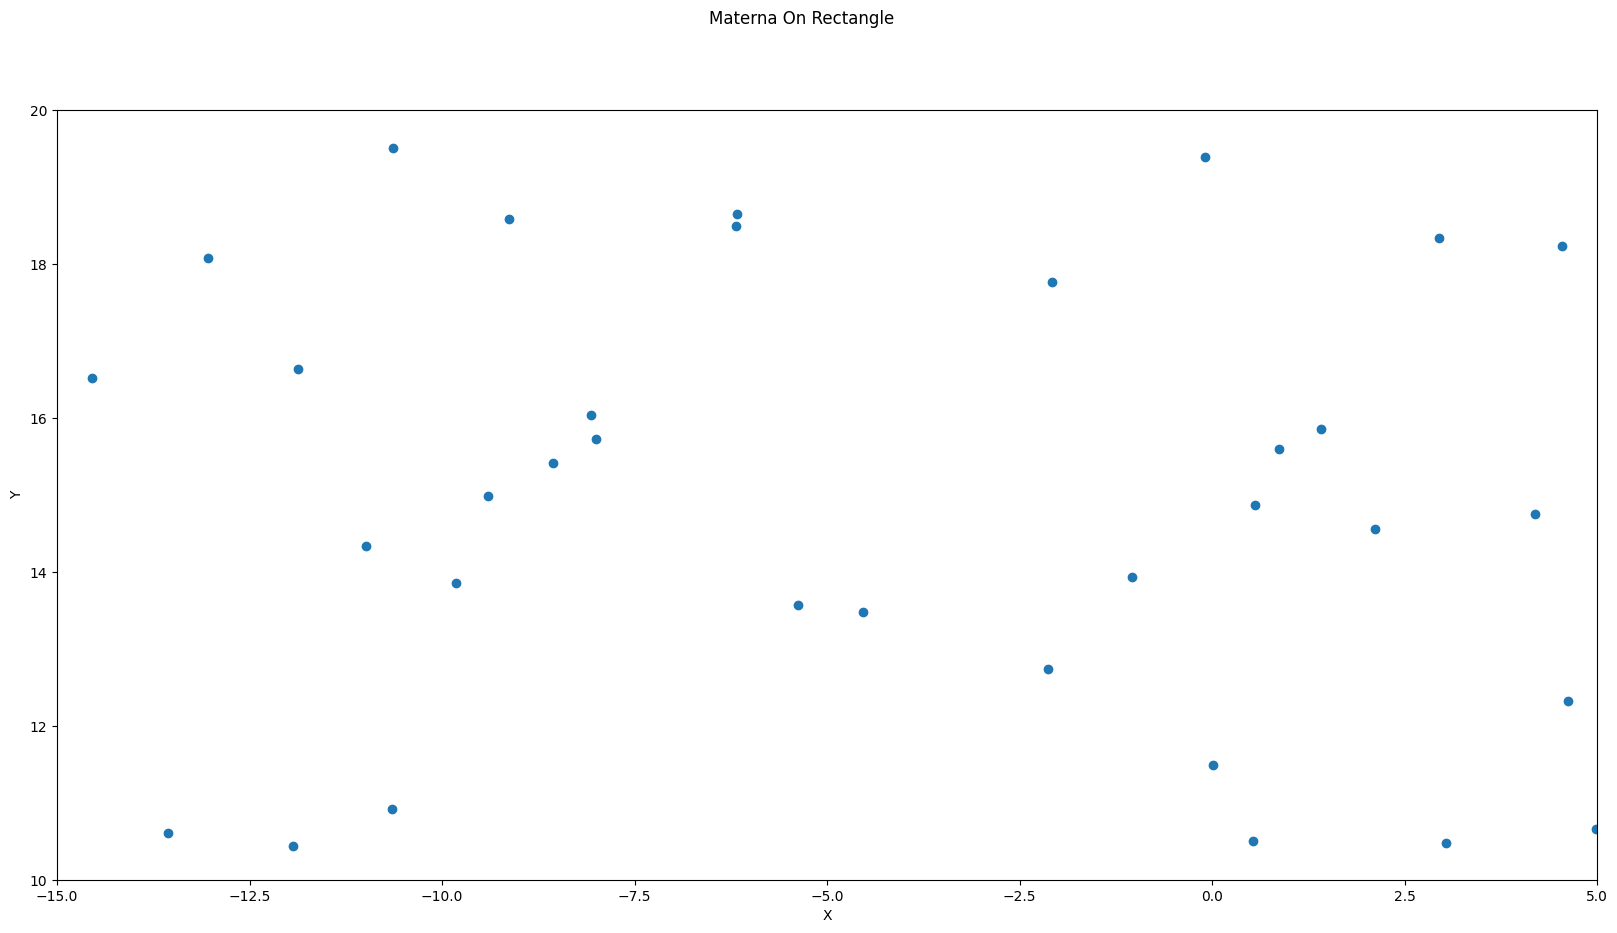

In [22]:
fig, axes = plt.subplots(1,1,figsize=(20,10))
result = materna_on_rectangle(parent_intensity=0.2, daughter_intensity=10, cluster_radius=1, x_lim=[-15,5], y_lim=[10,20])
axes.axis("square")
sns.scatterplot(data=result,x="X",y="Y",color="blue")
axes.set_xlim([-15,5])
axes.set_ylim([10,20])
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(result["X"], result["Y"])
fig.suptitle("Materna On Rectangle")
plt.grid(False)

### Zadanie 5: Proces punktowy Thomasa w obrębie prostokątnego obszaru [12 pkt]

#### a) Przygotowanie funkcji
Przygotuj funkcję `thomas_on_rectangle()`, która będzie generować proces punktowy Thomasa w obrębie prostokątnego obszaru.

Algorytm postępowania:
1. Rozszerzamy analizowany obszar o bufor, którego wielkość jest zależna od wartości parametru `cluster_sigma` (na potrzeby zadania przyjmijmy 4-krotność wartości tego parametru).
2. W obrębie rozszerzonego obszaru generujemy punkty w wykorzystaniem jednorodnego procesu Poissona o intensywności równej wartości parametru `parent_intensity`.
3. Dla każdego z wygenerowanych punktów (centrów klastrów):
    - Losujemy liczbę punktów znajdujących się w obrębie danego klastra $n_c$ z rozkładu Poissona o wartości oczekiwanej równej wartości parametru `mean_cluster_size`.
    - Niezależnie od siebie losujemy wartości współrzędnych $n_c$ punktów z rozkładów normalnych o wartości oczekiwanej równej współrzędnej punktu stanowiącego centrum klastra i odchyleniu standardowym równym wartości parametru `cluster_sigma`.
4. Usuwamy z rozkładu wszystkie punkty leżące poza analizowanym (nierozszerzonym) obszarem.

Uwagi do wykonania zadania:
- Punkty wygenerowane w ramach procesu macierzystego (centra klastrów) nie są częścią wynikowego rozkładu punktów.
- W części zadania dotyczącej generowania jednorodnego procesu punktowego Poissona nie należy dublować kodu napisanego w ramach zadania 2, a jedynie wywołać przygotowaną w ramach tego zadania funkcję `homogeneous_poisson_on_rectangle()`.

In [15]:
def thomas_on_rectangle(parent_intensity, mean_cluster_size, cluster_sigma, x_lim, y_lim):
    x_lim_modified = x_lim[:]
    y_lim_modified = y_lim[:]
    x_lim_modified[0] -= 4*cluster_sigma
    x_lim_modified[1] += 4*cluster_sigma
    y_lim_modified[0] -= 4*cluster_sigma
    y_lim_modified[1] += 4*cluster_sigma
    poisson_points = homogeneous_poisson_on_rectangle(parent_intensity, x_lim_modified, y_lim_modified)
    thomas_points = pd.DataFrame(columns = ["X", "Y"])
    for index, points in poisson_points.iterrows():
        number_of_points = np.random.poisson(mean_cluster_size)
        x = np.random.normal(points["X"], cluster_sigma, number_of_points)
        y = np.random.normal(points["Y"], cluster_sigma, number_of_points)
        temp_points = pd.DataFrame({"X" : x, "Y" : y})
        thomas_points = pd.concat([thomas_points, temp_points])
    thomas_points = thomas_points[(x_lim[0] < thomas_points["X"]) & (thomas_points["X"] < x_lim[1]) & (y_lim[0] < thomas_points["Y"]) & (thomas_points["Y"] < y_lim[1])]
    return thomas_points

In [16]:
# Komórka testowa
test_points_9 = thomas_on_rectangle(parent_intensity=0.13, mean_cluster_size=42, cluster_sigma=0.25, x_lim=[-12, 17], y_lim=[-20,-4])
assert type(test_points_9) == pd.DataFrame
assert test_points_9.shape[1] == 2
assert list(test_points_9.columns) == ["X", "Y"]
assert np.min(test_points_9["X"]) >= -12
assert np.max(test_points_9["X"]) <= 17
assert np.min(test_points_9["Y"]) >= -20
assert np.max(test_points_9["Y"]) <= -4

test_points_10 = thomas_on_rectangle(parent_intensity=0.54, mean_cluster_size=15, cluster_sigma=0.75, x_lim=[-25, -8], y_lim=[-2, 14])
assert type(test_points_10) == pd.DataFrame
assert test_points_10.shape[1] == 2
assert list(test_points_10.columns) == ["X", "Y"]
assert np.min(test_points_10["X"]) >= -25
assert np.max(test_points_10["X"]) <= -8
assert np.min(test_points_10["Y"]) >= -2
assert np.max(test_points_10["Y"]) <= 14

#### b) Wygenerowanie procesu i wizualizacja
Wykorzystaj przygotowaną funkcję do wygenerowania następującego rozkładu punktów i przedstaw go w postaci wykresu punktowego.

Parametry rozkładu:
 - intensywność procesu macierzystego: 0.2
 - średnia liczebność klastra: 30
 - odchylenie standardowe klastra: 0.5
 - zakres wartości współrzędnej x: $[25, 45]$
 - zakres wartości współrzędnej y: $[-10, 0]$

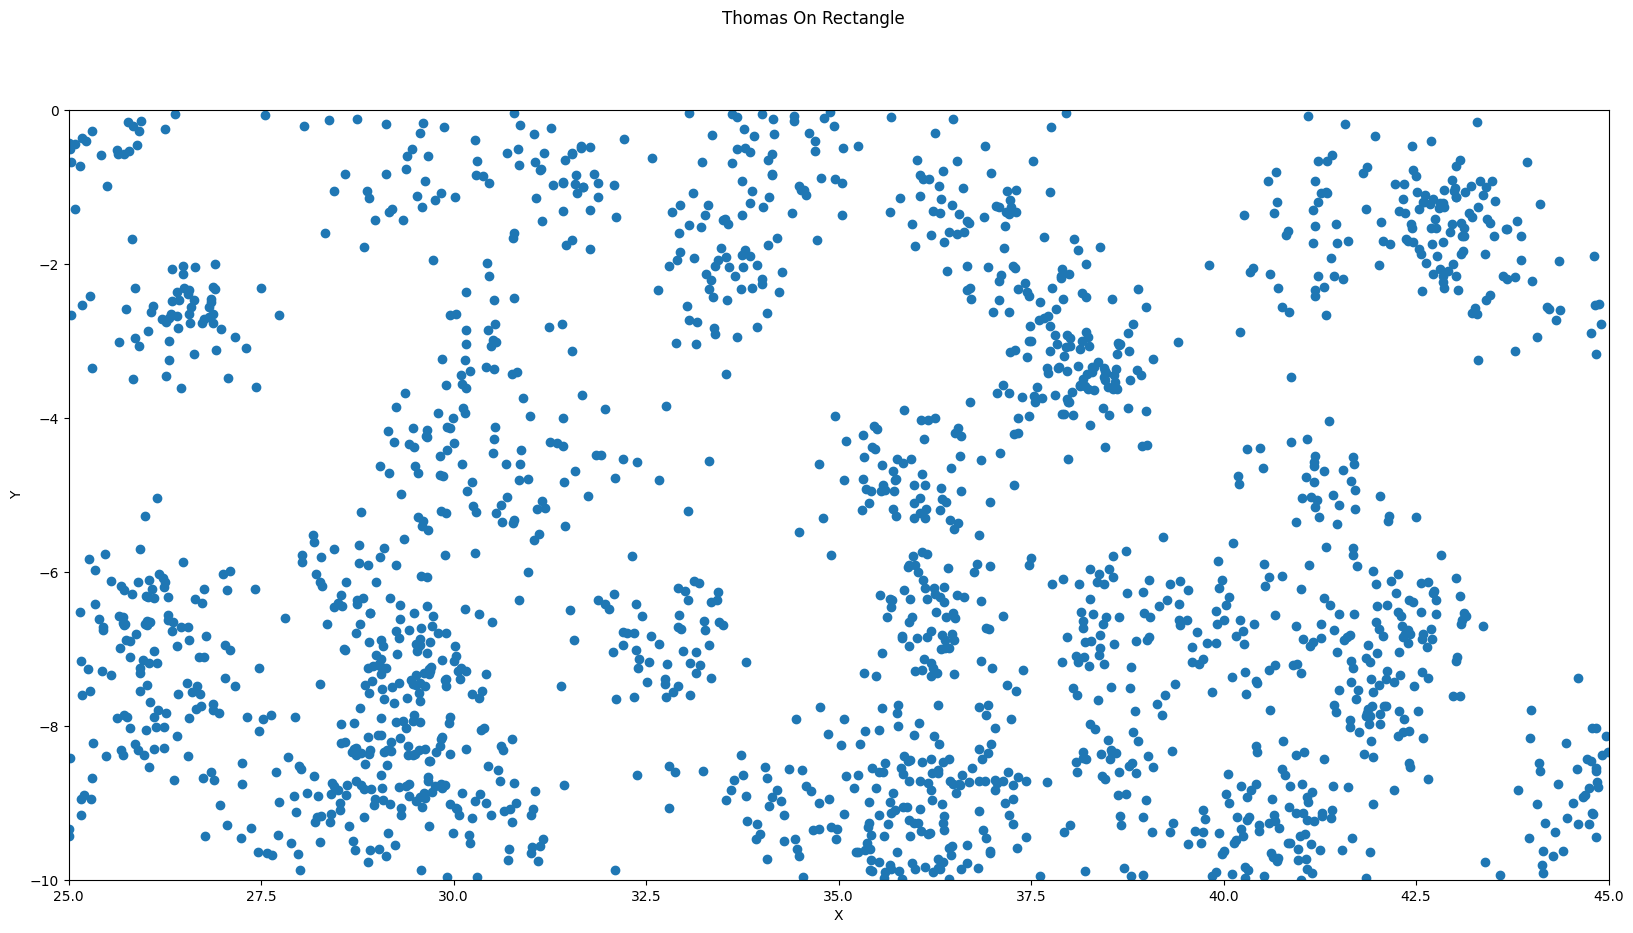

In [17]:
fig, axes = plt.subplots(1,1,figsize=(20,10))
points =  thomas_on_rectangle(parent_intensity=0.2, mean_cluster_size=30, cluster_sigma=0.5, x_lim=[25, 45], y_lim=[-10, 0])
axes.axis("square")
axes.set_xlim(25,45)
axes.set_ylim(-10,0)
plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(points["X"], points["Y"])
fig.suptitle("Thomas On Rectangle")
plt.grid(False)